### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Calculando o faturamento de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


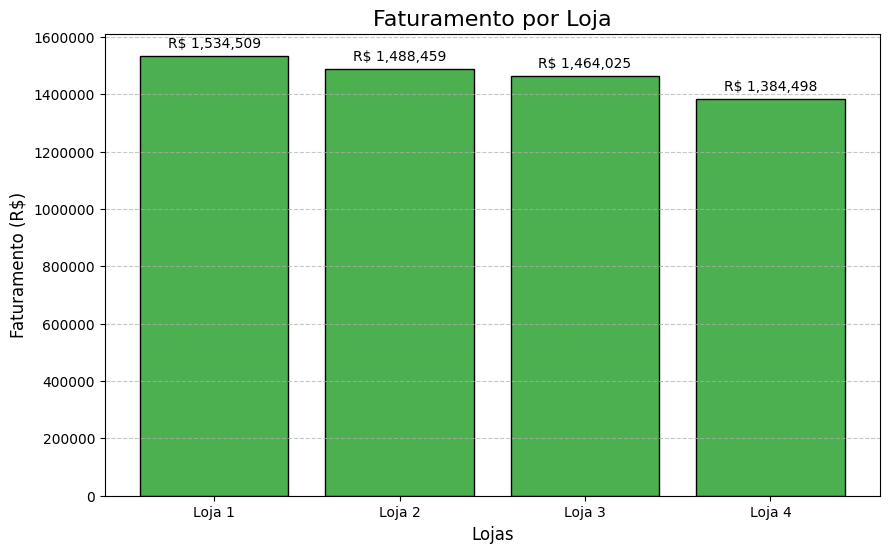

In [4]:
import matplotlib.pyplot as plt

# Dados para o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando o gráfico de barras
plt.figure(figsize=(10,6))
barras = plt.bar(lojas, faturamentos, color='#4CAF50', edgecolor='black')  # cor verde suave e borda preta

# Título e eixos
plt.title('Faturamento por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatando o eixo Y para mostrar valores normais (sem notação científica 1e6)
plt.ticklabel_format(style='plain', axis='y')

# Colocar os valores acima das barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 20000, f'R$ {yval:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

# 2. Vendas por Categoria


In [7]:
# Contando as vendas por categoria para cada loja
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

# Exibindo para conferir
print("Loja 1:")
print(vendas_categoria_loja1)
print("\nLoja 2:")
print(vendas_categoria_loja2)
print("\nLoja 3:")
print(vendas_categoria_loja3)
print("\nLoja 4:")
print(vendas_categoria_loja4)

Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

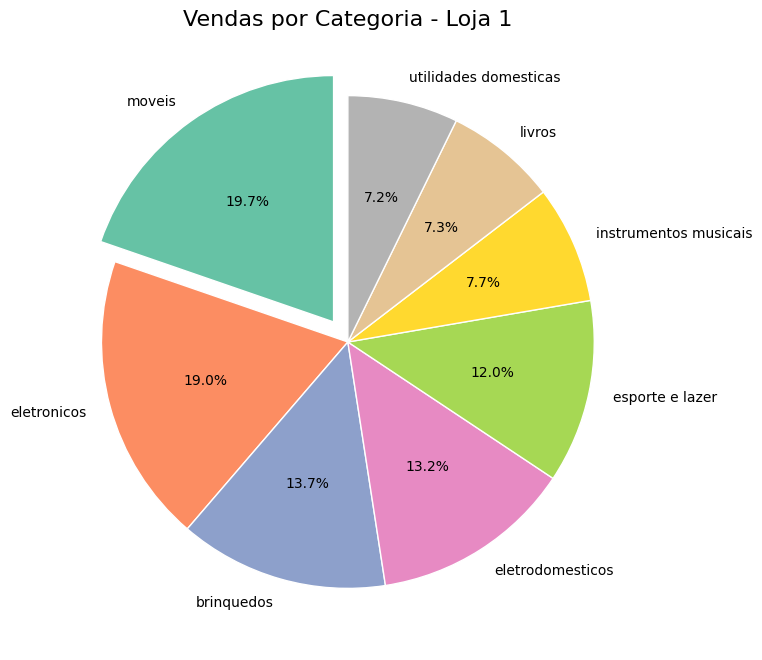

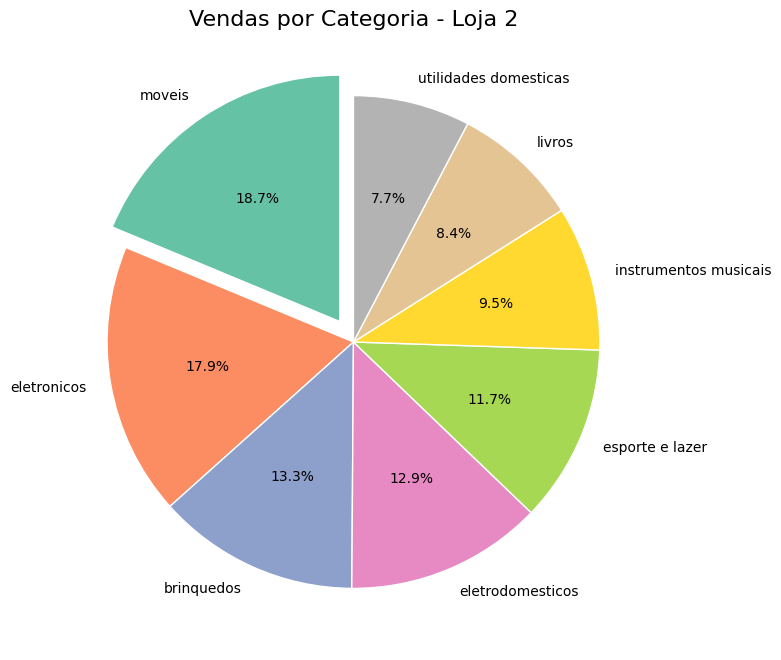

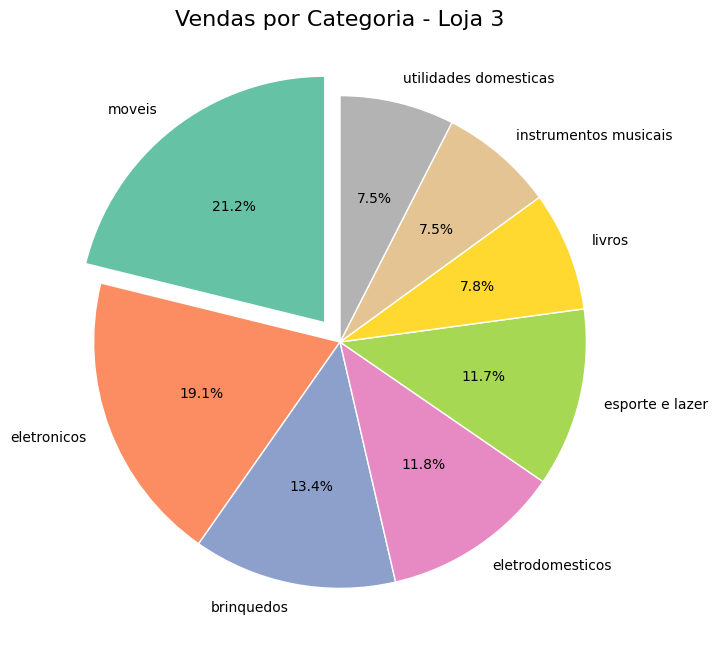

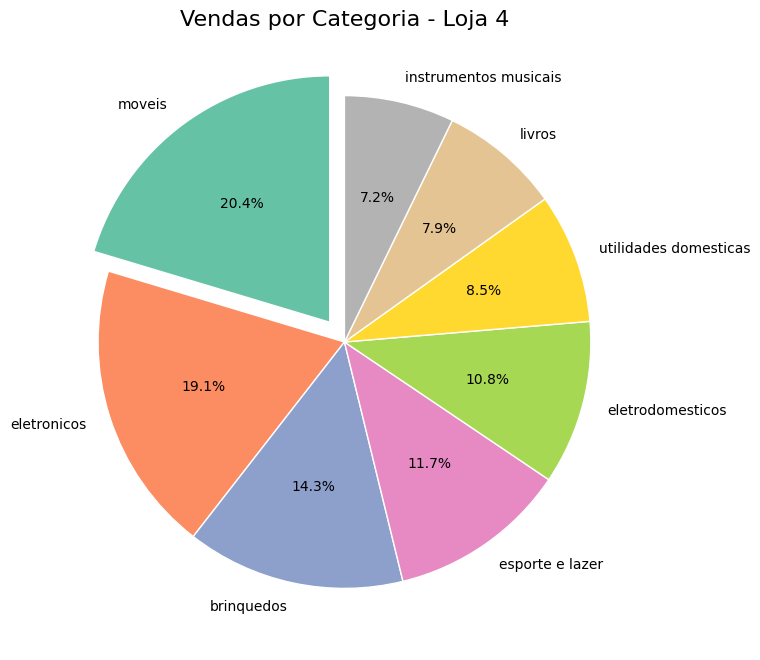

In [19]:
import matplotlib.pyplot as plt

# Lista com as vendas por categoria de cada loja
dados_lojas = [vendas_categoria_loja1, vendas_categoria_loja2, vendas_categoria_loja3, vendas_categoria_loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Paleta de cores (a mesma para todas para manter padrão)
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Loop para gerar os gráficos
for i in range(4):
    dados = dados_lojas[i]

    # Detecta automaticamente a categoria mais vendida para explodir
    explode = [0.1 if valor == dados.max() else 0 for valor in dados]

    plt.figure(figsize=(8,8))
    plt.pie(
        dados,
        labels=dados.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode,
        colors=cores,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Vendas por Categoria - {titulos[i]}', fontsize=16)
    plt.show()

# 3. Média de Avaliação das Lojas

In [13]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


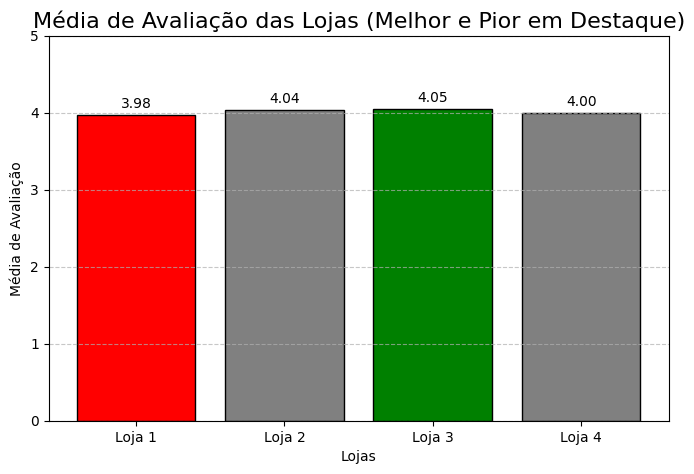

In [18]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Descobrir a melhor e pior média
melhor_media = max(medias)
pior_media = min(medias)

# Criar lista de cores
cores = []
for media in medias:
    if media == melhor_media:
        cores.append('green')  # Melhor loja → verde
    elif media == pior_media:
        cores.append('red')    # Pior loja → vermelho
    else:
        cores.append('gray')   # Outras lojas → cinza

# Criando o gráfico de barras
plt.figure(figsize=(8,5))
barras = plt.bar(lojas, medias, color=cores, edgecolor='black')

# Título e Eixos
plt.title('Média de Avaliação das Lojas (Melhor e Pior em Destaque)', fontsize=16)
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [17]:
# Produto mais e menos vendido da Loja 1
produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 2
produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 3
produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

# Produto mais e menos vendido da Loja 4
produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

# Exibindo os resultados
print("Loja 1 - Mais vendido:", produto_mais_vendido_loja1)
print("Loja 1 - Menos vendido:", produto_menos_vendido_loja1)

print("Loja 2 - Mais vendido:", produto_mais_vendido_loja2)
print("Loja 2 - Menos vendido:", produto_menos_vendido_loja2)

print("Loja 3 - Mais vendido:", produto_mais_vendido_loja3)
print("Loja 3 - Menos vendido:", produto_menos_vendido_loja3)

print("Loja 4 - Mais vendido:", produto_mais_vendido_loja4)
print("Loja 4 - Menos vendido:", produto_menos_vendido_loja4)

Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programação
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra


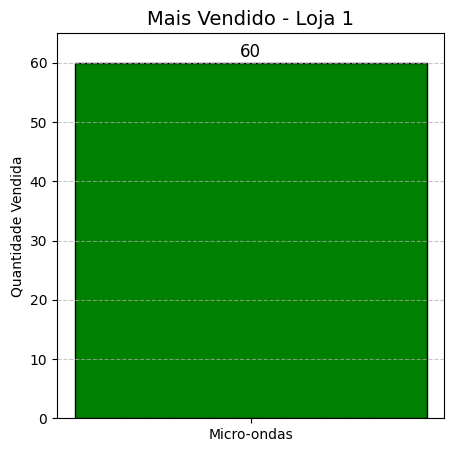

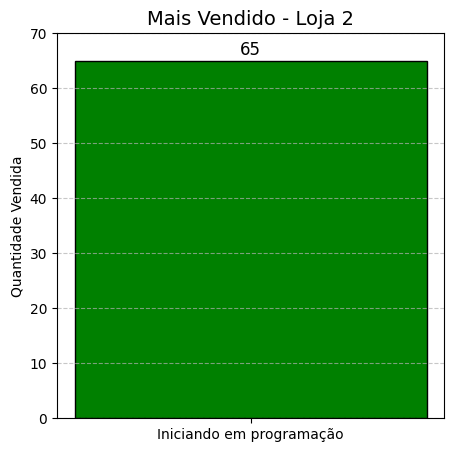

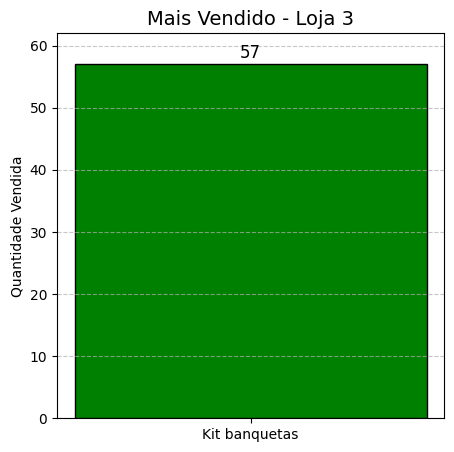

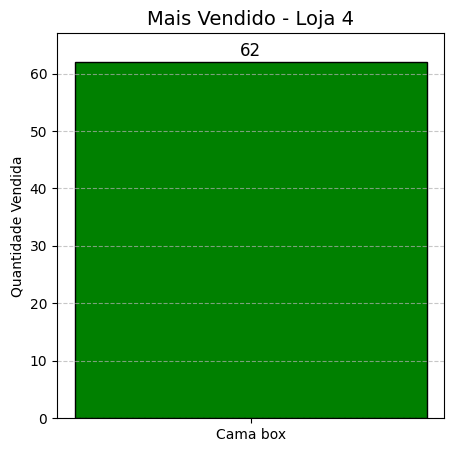

In [22]:
import matplotlib.pyplot as plt

# Função para criar o gráfico
def grafico_produto_vendido(nome_loja, produto, quantidade, cor):
    plt.figure(figsize=(5,5))
    plt.bar(produto, quantidade, color=cor, edgecolor='black')
    plt.title(f'Mais Vendido - {nome_loja}', fontsize=14)
    plt.ylabel('Quantidade Vendida')
    plt.ylim(0, quantidade + 5)  # margem no gráfico
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(0, quantidade + 1, int(quantidade), ha='center', fontsize=12)
    plt.show()

# Produto mais vendido de cada loja
top1_loja1 = loja['Produto'].value_counts().idxmax()
qtd_top1_loja1 = loja['Produto'].value_counts().max()

top1_loja2 = loja2['Produto'].value_counts().idxmax()
qtd_top1_loja2 = loja2['Produto'].value_counts().max()

top1_loja3 = loja3['Produto'].value_counts().idxmax()
qtd_top1_loja3 = loja3['Produto'].value_counts().max()

top1_loja4 = loja4['Produto'].value_counts().idxmax()
qtd_top1_loja4 = loja4['Produto'].value_counts().max()

# Gerar gráficos dos mais vendidos (verde)
grafico_produto_vendido('Loja 1', top1_loja1, qtd_top1_loja1, 'green')
grafico_produto_vendido('Loja 2', top1_loja2, qtd_top1_loja2, 'green')
grafico_produto_vendido('Loja 3', top1_loja3, qtd_top1_loja3, 'green')
grafico_produto_vendido('Loja 4', top1_loja4, qtd_top1_loja4, 'green')

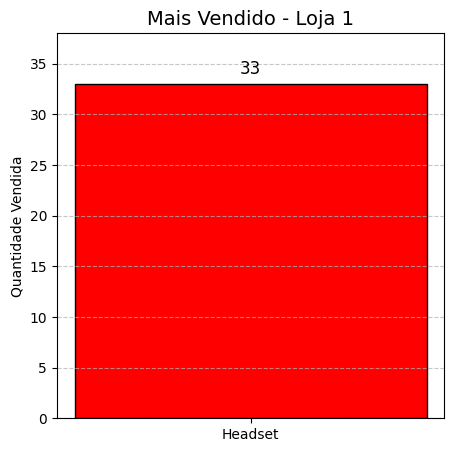

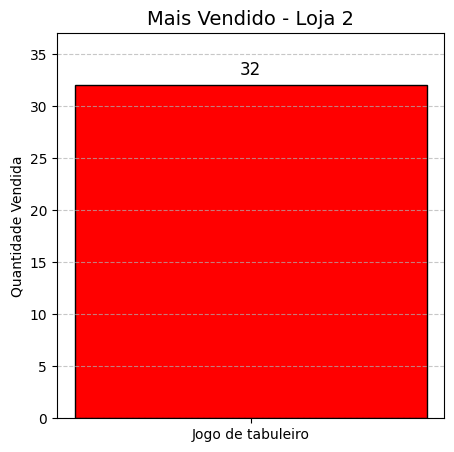

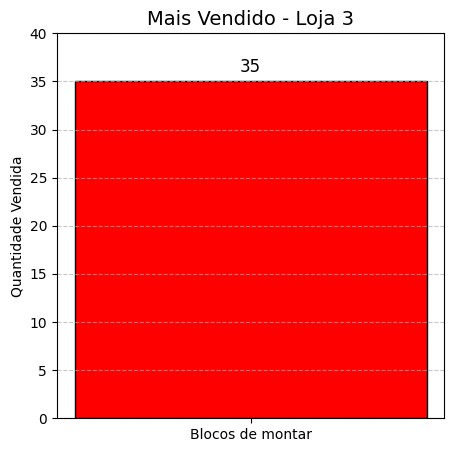

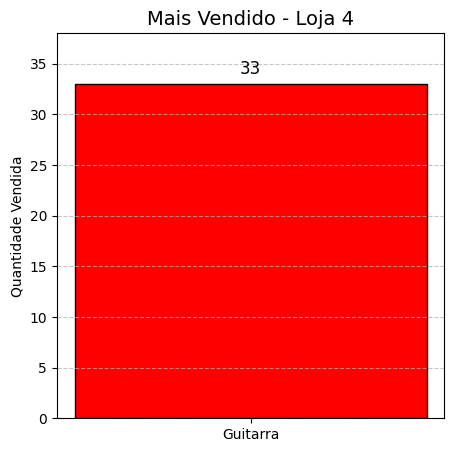

In [23]:
# Produto menos vendido de cada loja
bottom1_loja1 = loja['Produto'].value_counts().idxmin()
qtd_bottom1_loja1 = loja['Produto'].value_counts().min()

bottom1_loja2 = loja2['Produto'].value_counts().idxmin()
qtd_bottom1_loja2 = loja2['Produto'].value_counts().min()

bottom1_loja3 = loja3['Produto'].value_counts().idxmin()
qtd_bottom1_loja3 = loja3['Produto'].value_counts().min()

bottom1_loja4 = loja4['Produto'].value_counts().idxmin()
qtd_bottom1_loja4 = loja4['Produto'].value_counts().min()

# Gerar gráficos dos menos vendidos (vermelho)
grafico_produto_vendido('Loja 1', bottom1_loja1, qtd_bottom1_loja1, 'red')
grafico_produto_vendido('Loja 2', bottom1_loja2, qtd_bottom1_loja2, 'red')
grafico_produto_vendido('Loja 3', bottom1_loja3, qtd_bottom1_loja3, 'red')
grafico_produto_vendido('Loja 4', bottom1_loja4, qtd_bottom1_loja4, 'red')

# 5. Frete Médio por Loja


In [24]:
# Calculando o frete médio de cada loja
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

# Exibindo os resultados
print(f"Frete médio - Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio - Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio - Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio - Loja 4: R$ {frete_medio_loja4:.2f}")

Frete médio - Loja 1: R$ 34.69
Frete médio - Loja 2: R$ 33.62
Frete médio - Loja 3: R$ 33.07
Frete médio - Loja 4: R$ 31.28


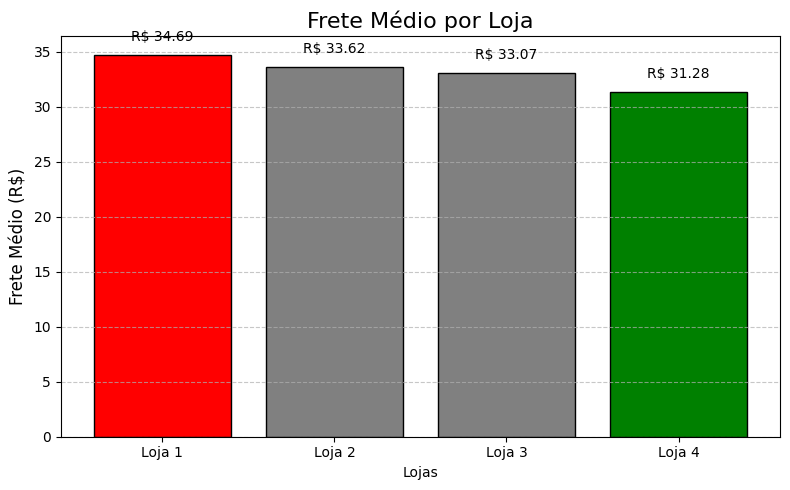

In [25]:
import matplotlib.pyplot as plt

# Dados para o gráfico
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

# Descobrir quem tem o maior e o menor frete
frete_mais_alto = max(fretes)
frete_mais_baixo = min(fretes)

# Definindo cores: vermelho para frete mais alto, verde para o mais barato, cinza para os demais
cores = []
for valor in fretes:
    if valor == frete_mais_baixo:
        cores.append('green')
    elif valor == frete_mais_alto:
        cores.append('red')
    else:
        cores.append('gray')

# Criando o gráfico de barras
plt.figure(figsize=(8,5))
barras = plt.bar(lojas, fretes, color=cores, edgecolor='black')

# Título e Eixos
plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 📖 Relatório de Análise de Dados - Alura Store

## 🏬 Objetivo
O objetivo deste desafio foi auxiliar o Sr. João, proprietário de quatro lojas no e-commerce Alura Store, a decidir qual loja vender, com base na análise de métricas como faturamento, vendas por categoria, avaliação de clientes, produtos mais e menos vendidos e custo médio de frete.

---

## 📈 1. Análise do Faturamento

Faturamento total de cada loja:

- **Loja 1:** R$ 1.534.509,12
- **Loja 2:** R$ 1.488.459,06
- **Loja 3:** R$ 1.464.025,03
- **Loja 4:** R$ 1.384.497,58

✅ A Loja 1 teve o maior faturamento.  
✅ A Loja 4 teve o menor faturamento.

![G1](URL-da-Imagem)

---

## 🛒 2. Análise das Vendas por Categoria

Quantidade de vendas por categoria:

### Loja 1:
- Móveis: 465
- Eletrônicos: 448
- Brinquedos: 324
- Eletrodomésticos: 312
- Esporte e Lazer: 284
- Instrumentos Musicais: 182
- Livros: 173
- Utilidades Domésticas: 171

### Loja 2:
- Móveis: 442
- Eletrônicos: 422
- Brinquedos: 313
- Eletrodomésticos: 305
- Esporte e Lazer: 275
- Instrumentos Musicais: 224
- Livros: 197
- Utilidades Domésticas: 181

### Loja 3:
- Móveis: 499
- Eletrônicos: 451
- Brinquedos: 315
- Eletrodomésticos: 278
- Esporte e Lazer: 277
- Livros: 185
- Instrumentos Musicais: 177
- Utilidades Domésticas: 177

### Loja 4:
- Móveis: 480
- Eletrônicos: 451
- Brinquedos: 338
- Esporte e Lazer: 277
- Eletrodomésticos: 254
- Utilidades Domésticas: 201
- Livros: 187
- Instrumentos Musicais: 170

✅ Todas as lojas têm como principais categorias: móveis e eletrônicos.  
✅ A Loja 4 apresentou um volume geral de vendas um pouco menor.

**Gráficos:** Gráficos de pizza para cada loja.

---

## 🌟 3. Média de Avaliação das Lojas

Média de avaliação dos clientes:

- **Loja 1:** 3,98
- **Loja 2:** 4,04
- **Loja 3:** 4,05
- **Loja 4:** 4,00

✅ A Loja 3 apresentou a melhor média de avaliação.  
✅ A Loja 1 apresentou a pior média de avaliação.

**Gráfico:** Barras comparando médias de avaliação (verde para melhor, vermelho para pior).

---

## 🎯 4. Produtos Mais e Menos Vendidos

Identificação dos produtos:

| Loja   | Produto Mais Vendido          | Produto Menos Vendido |
|:-------|:-------------------------------|:----------------------|
| Loja 1 | Micro-ondas                    | Headset               |
| Loja 2 | Iniciando em programação        | Jogo de tabuleiro     |
| Loja 3 | Kit banquetas                   | Blocos de montar      |
| Loja 4 | Cama box                        | Guitarra              |

✅ Observa-se que produtos de linha branca (eletrodomésticos) e móveis são mais populares.

**Gráficos:** Barras individuais para produtos mais vendidos (verde) e produtos menos vendidos (vermelho).

---

## 🚚 5. Frete Médio por Loja

Média de frete cobrada em cada loja:

- **Loja 1:** R$ 34,69
- **Loja 2:** R$ 33,62
- **Loja 3:** R$ 33,07
- **Loja 4:** R$ 31,28

✅ A Loja 4 apresentou o menor frete médio.  
✅ A Loja 1 apresentou o maior frete médio.

**Gráfico:** Barras coloridas indicando o menor (verde) e o maior (vermelho) frete médio.

---

## 🧠 Conclusão Final

**Recomendação:**  
Com base nos dados analisados, recomenda-se a venda da **Loja 4**, considerando:

- Foi a loja com **menor faturamento**.
- Teve **frete médio mais baixo**, o que poderia ser positivo, mas não compensou o baixo volume de vendas.
- Apesar da avaliação razoável, **não superou** as outras lojas em nenhum dos critérios principais de desempenho.

Essa estratégia permite ao Sr. João investir seu capital nas lojas com maior potencial de crescimento e melhor reputação.

---

## ✅ Observações Finais

- Todas as análises foram realizadas utilizando Python, Pandas e Matplotlib no ambiente Google Colab.
- Projeto documentado e hospedado no GitHub conforme exigido pelo programa ONE Oracle Alura.

---

## 📂 Link do Repositório GitHub
> *(Inserir aqui o link do repositório depois que subir o projeto.)*
